<a href="https://colab.research.google.com/github/Ravikrishnan05/Final_year_project/blob/main/WithMLFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = "/content/drive/MyDrive/Data.zip"           # Path of your ZIP
extract_path = "/content/drive/MyDrive/Data_Unzipped"  # Where to extract

In [4]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("📦 Files inside ZIP:\n")
    for file in zip_ref.namelist()[:40]:  # print first 40 files
        print(file)

📦 Files inside ZIP:

Data/
Data/Dataset.csv
Data/EOG Data/
Data/EOG Data/Raw Data/
Data/EOG Data/Raw Data/01.mat
Data/EOG Data/Raw Data/02.mat
Data/EOG Data/Raw Data/03.mat
Data/EOG Data/Raw Data/04.mat
Data/EOG Data/Raw Data/05.mat
Data/EOG Data/Raw Data/06.mat
Data/EOG Data/Raw Data/07.mat
Data/EOG Data/Raw Data/08.mat
Data/EOG Data/Raw Data/09.mat
Data/EOG Data/Raw Data/10.mat
Data/EOG Data/Raw Data/11.mat
Data/EOG Data/Raw Data/12.mat
Data/EOG Data/Raw Data/13.mat
Data/EOG Data/Raw Data/14.mat
Data/EOG Data/Raw Data/15.mat
Data/EOG Data/Raw Data/16.mat
Data/EOG Data/Raw Data/17.mat
Data/EOG Data/Raw Data/18.mat
Data/EOG Data/Raw Data/19.mat
Data/EOG Data/Raw Data/20.mat
Data/EOG Data/Raw Data/21.mat
Data/EOG Data/Raw Data/22.mat
Data/EOG Data/Raw Data/23.mat
Data/EOG Data/Raw Data/24.mat
Data/EOG Data/Raw Data/25.mat
Data/EOG Data/Raw Data/26.mat
Data/EOG Data/Raw Data/27.mat
Data/EOG Data/Signals Features/
Data/EOG Data/Signals Features/P_01/
Data/EOG Data/Signals Features/P_01/bl

In [5]:
import zipfile
import os

# Create extract folder if not exists
os.makedirs(extract_path, exist_ok=True)

# Extract everything
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete!")
print("📁 Files extracted to:", extract_path)


✅ Extraction complete!
📁 Files extracted to: /content/drive/MyDrive/Data_Unzipped


In [6]:
import os

print("📂 Extracted folders/files:")
for root, dirs, files in os.walk(extract_path):
    print(root)
    break   # print only top folder

📂 Extracted folders/files:
/content/drive/MyDrive/Data_Unzipped


In [8]:
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [9]:
import glob

print("🚀 DEBUG MODE ENABLED — Inspecting Data Loading Step by Step\n")

all_X = []
all_Y = []

files = sorted(glob.glob(os.path.join(raw_dir, '*.mat')))
print(f"📁 Total MAT files found in Raw Data: {len(files)}")
print("📂 File list (first few):", [os.path.basename(f) for f in files[:5]], "\n")

for fpath in files:
    pid = os.path.basename(fpath).split('.')[0]
    print(f"-------------------------------")
    print(f"📌 Processing file: {pid}")
    print(f"📍 Path: {fpath}")

    # Load Signals
    h, v = load_raw_signal(fpath)
    print(f"   ➤ Loaded H signal length: {len(h)}")
    print(f"   ➤ Loaded V signal length: {len(v)}")

    # Load Labels
    labels = load_labels(pid)
    if labels is None:
        print("   ⚠️ No labels found — skipping file.\n")
        continue

    print(f"   ➤ Labels loaded, length: {len(labels)}")

    # Trim lengths to match
    min_len = min(len(h), len(labels))
    h, v, labels = h[:min_len], v[:min_len], labels[:min_len]
    print(f"   ✂️ Trimmed all to length: {min_len}")

    # Slice into windows
    num_windows = (len(h) - PARAMS["window_size"]) // PARAMS["stride"]
    print(f"   🪟 Total windows possible: {num_windows}")

    for i in range(num_windows):
        start = i * PARAMS["stride"]
        end = start + PARAMS["window_size"]

        win_h = (h[start:end] - np.mean(h[start:end])) / (np.std(h[start:end]) + 1e-6)
        win_v = (v[start:end] - np.mean(v[start:end])) / (np.std(v[start:end]) + 1e-6)

        if i == 0:
            print(f"      🔍 First Window Stats:")
            print(f"        start={start}, end={end}")
            print(f"        win_h mean={np.mean(win_h):.4f}, std={np.std(win_h):.4f}")
            print(f"        win_v mean={np.mean(win_v):.4f}, std={np.std(win_v):.4f}")

        all_X.append(np.stack([win_h, win_v], axis=0))
        all_Y.append(labels[start:end])

    print(f"   📦 Windows collected so far: {len(all_X)}\n")

# Final shapes
X_data = np.array(all_X, dtype=np.float32)
Y_data = np.array(all_Y, dtype=np.longlong)

print("==============================================")
print("🎉 DATA SUMMARY")
print(f"✔️ Final X_data shape: {X_data.shape}   (windows, channels, window_size)")
print(f"✔️ Final Y_data shape: {Y_data.shape}   (windows, window_size)")
print(f"📊 Total windows prepared: {len(X_data)}")
print("==============================================\n")

🚀 DEBUG MODE ENABLED — Inspecting Data Loading Step by Step



NameError: name 'raw_dir' is not defined

In [10]:
import numpy as np
import pandas as pd
import scipy.io
import h5py
import os
import glob
import time
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# ==========================================
# 1. CONFIGURATION & PARAMS
# ==========================================
PARAMS = {
    "window_size": 500,
    "stride": 250,
    "batch_size": 32,
    "test_size": 0.2,
    "random_seed": 42,
}

base_path = '/content/drive/MyDrive/Data_Unzipped/Data/EOG Data'
raw_dir = os.path.join(base_path, 'Raw Data')
feat_dir = os.path.join(base_path, 'Signals Features')

print("⚙️ Debug Mode: Data Loading & Preprocessing Flow\n")

# ==========================================
# 2. LOADING FUNCTIONS
# ==========================================
def load_raw_signal(fpath):
    print(f"   📥 Loading Raw Signals from: {os.path.basename(fpath)}")
    try:
        mat = scipy.io.loadmat(fpath)
        keys = [k for k in mat.keys() if not k.startswith('_')]
        return mat[keys[0]].flatten(), mat[keys[1]].flatten()
    except NotImplementedError:
        with h5py.File(fpath, 'r') as f:
            keys = sorted(list(f.keys()))
            return np.array(f[keys[0]]).flatten(), np.array(f[keys[1]]).flatten()

def load_labels(pid):
    path = os.path.join(feat_dir, f"P_{pid}", "label_sig.csv")
    print(f"   📥 Loading Labels from: {path}")
    if os.path.exists(path):
        df = pd.read_csv(path, header=None, dtype=str)
        vals = pd.to_numeric(df.values.flatten(), errors='coerce')
        vals = np.nan_to_num(vals, nan=1.0)
        return vals.astype(int)
    print("   ❌ Labels Not Found!")
    return None

# ==========================================
# 3. PREPARE DATASET (DEBUG MODE)
# ==========================================
print("🚀 Starting dataset preparation...\n")

all_X = []
all_Y = []

files = sorted(glob.glob(os.path.join(raw_dir, "*.mat")))
print(f"📁 Total MAT Files Found: {len(files)}\n")

for fpath in files:
    pid = os.path.basename(fpath).split('.')[0]
    print("------------------------------------------------------------")
    print(f"🔍 Processing File: {pid}")

    h, v = load_raw_signal(fpath)
    labels = load_labels(pid)

    print(f"   H signal length = {len(h)}, V signal length = {len(v)}")

    if labels is None:
        print("   ⚠️ Skipping due to missing labels\n")
        continue

    print(f"   Labels loaded length = {len(labels)}")

    # Length Fixing
    min_len = min(len(h), len(labels))
    h, v, labels = h[:min_len], v[:min_len], labels[:min_len]
    print(f"   ✂ Trimmed Length: {min_len}")

    # Window Slicing
    num_windows = (len(h) - PARAMS["window_size"]) // PARAMS["stride"]
    print(f"   🪟 Windows possible = {num_windows}")

    for i in range(num_windows):
        start = i * PARAMS["stride"]
        end = start + PARAMS["window_size"]

        win_h = (h[start:end] - np.mean(h[start:end])) / (np.std(h[start:end]) + 1e-6)
        win_v = (v[start:end] - np.mean(v[start:end])) / (np.std(v[start:end]) + 1e-6)

        if i == 0:
            print("      🔬 First window check:")
            print(f"         start={start}, end={end}")
            print(f"         mean(H)={np.mean(win_h):.4f}, std(H)={np.std(win_h):.4f}")
            print(f"         mean(V)={np.mean(win_v):.4f}, std(V)={np.std(win_v):.4f}")

        all_X.append(np.stack([win_h, win_v], axis=0))
        all_Y.append(labels[start:end])

    print(f"   📦 Windows collected so far: {len(all_X)}\n")

# Final dataset arrays
X_data = np.array(all_X, dtype=np.float32)
Y_data = np.array(all_Y, dtype=np.longlong)

print("==================================================")
print("🎉 DATA SUMMARY")
print(f"✔ Final X_data shape  = {X_data.shape} (windows, channels, window_size)")
print(f"✔ Final Y_data shape  = {Y_data.shape} (windows, window_size)")
print(f"📦 Total windows collected = {len(X_data)}")
print("==================================================\n")

# ==========================================
# 4. CREATE DATA LOADERS (DEBUG)
# ==========================================
class EOGDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

X_train, X_val, Y_train, Y_val = train_test_split(
    X_data, Y_data, test_size=PARAMS["test_size"], random_state=PARAMS["random_seed"]
)

print(f"📊 Train size: {len(X_train)}, Validation size: {len(X_val)}")

train_loader = DataLoader(EOGDataset(X_train, Y_train), batch_size=PARAMS["batch_size"], shuffle=True)
val_loader = DataLoader(EOGDataset(X_val, Y_val), batch_size=PARAMS["batch_size"], shuffle=False)

# Check first batch
for batch_X, batch_Y in train_loader:
    print("\n🔎 DataLoader Batch Example:")
    print(f"   batch_X shape = {batch_X.shape}")
    print(f"   batch_Y shape = {batch_Y.shape}")
    break

print("\n🎯 Debugging Complete — Ready for Model Training Step Next!\n")


⚙️ Debug Mode: Data Loading & Preprocessing Flow

🚀 Starting dataset preparation...

📁 Total MAT Files Found: 27

------------------------------------------------------------
🔍 Processing File: 01
   📥 Loading Raw Signals from: 01.mat
   📥 Loading Labels from: /content/drive/MyDrive/Data_Unzipped/Data/EOG Data/Signals Features/P_01/label_sig.csv
   H signal length = 17251, V signal length = 17251
   Labels loaded length = 17251
   ✂ Trimmed Length: 17251
   🪟 Windows possible = 67
      🔬 First window check:
         start=0, end=500
         mean(H)=0.0000, std(H)=1.0000
         mean(V)=-0.0000, std(V)=1.0000
   📦 Windows collected so far: 67

------------------------------------------------------------
🔍 Processing File: 02
   📥 Loading Raw Signals from: 02.mat
   📥 Loading Labels from: /content/drive/MyDrive/Data_Unzipped/Data/EOG Data/Signals Features/P_02/label_sig.csv
   H signal length = 17250, V signal length = 17250
   Labels loaded length = 17250
   ✂ Trimmed Length: 17250
 

In [11]:
print(f"✅ Data Loaded! Total Windows: {len(X_data)}")


✅ Data Loaded! Total Windows: 1808



📌 DEBUG INFORMATION:
X_data Shape : (1808, 2, 500)
Y_data Shape : (1808, 500)
Unique Labels in Dataset : [0 1 2 3]
Label Counts : 
{np.int64(0): np.int64(44047), np.int64(1): np.int64(700445), np.int64(2): np.int64(79790), np.int64(3): np.int64(79718)}

🔍 Inspecting window index: 1387
Signal shape (C, T): (2, 500)
Label shape (T): (500,)
Label distribution inside window: (array([0, 1, 2, 3], dtype=int64), array([ 16, 323,  15, 146]))


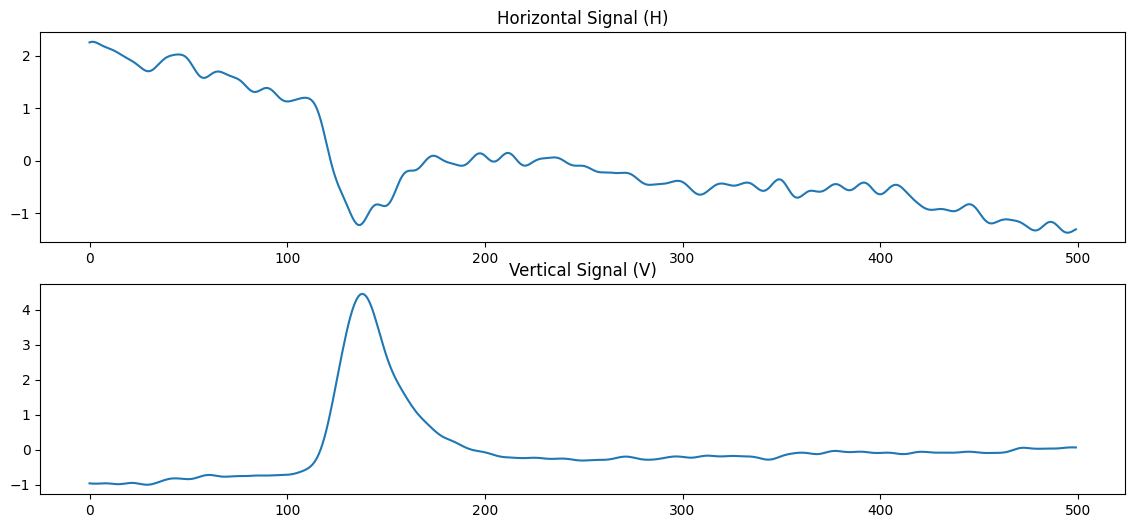

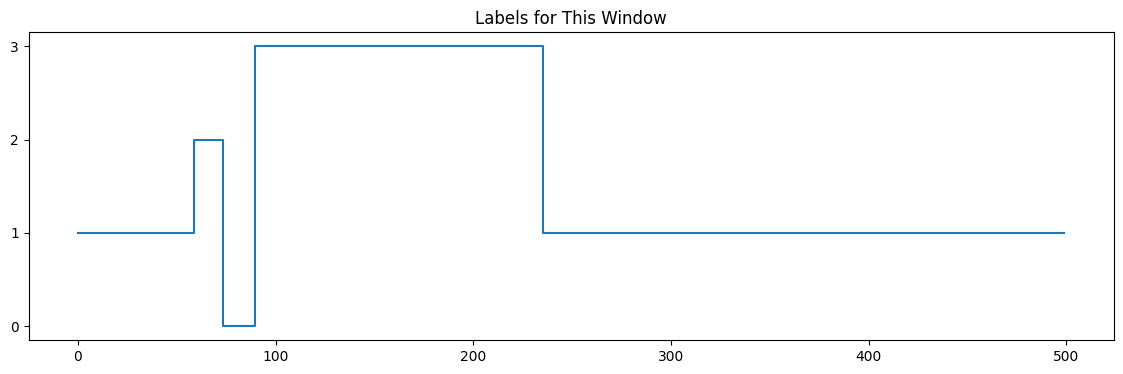

In [12]:
# ==========================================
#  DEBUG / VERIFICATION BEFORE TRAINING
# ==========================================
print("\n📌 DEBUG INFORMATION:")
print(f"X_data Shape : {X_data.shape}")  # (num_windows, channels=2, window_size)
print(f"Y_data Shape : {Y_data.shape}")  # (num_windows, window_size)
print(f"Unique Labels in Dataset : {np.unique(Y_data)}")
print(f"Label Counts : ")
(unique, counts) = np.unique(Y_data, return_counts=True)
print(dict(zip(unique, counts)))

# Check one random sample window
idx = np.random.randint(0, len(X_data))
print(f"\n🔍 Inspecting window index: {idx}")

sample_x = X_data[idx]
sample_y = Y_data[idx]

print("Signal shape (C, T):", sample_x.shape)
print("Label shape (T):", sample_y.shape)
print("Label distribution inside window:", np.unique(sample_y, return_counts=True))


# ===========================
#  VISUALIZE SIGNAL + LABEL
# ===========================
import matplotlib.pyplot as plt

t = np.arange(PARAMS["window_size"])

plt.figure(figsize=(14, 6))
plt.subplot(2,1,1)
plt.title("Horizontal Signal (H)")
plt.plot(t, sample_x[0])          # Horizontal channel
plt.subplot(2,1,2)
plt.title("Vertical Signal (V)")
plt.plot(t, sample_x[1])          # Vertical channel
plt.show()

# Plot labels as step signal
plt.figure(figsize=(14, 4))
plt.title("Labels for This Window")
plt.step(t, sample_y, where='mid')
plt.yticks(np.unique(sample_y))
plt.show()


In [13]:
window_size = 500
stride = 250  # adjust if different

windows_info = []

for idx, start in enumerate(range(0, len(labels) - window_size, stride)):
    end = start + window_size

    # extract label slice
    window_labels = labels[start:end]

    # count unique labels in this window
    unique, counts = np.unique(window_labels, return_counts=True)
    label_distribution = dict(zip(unique, counts))

    windows_info.append((idx + 1, start, end, label_distribution))

# Print summary
for info in windows_info:
    w_id, start, end, dist = info
    print(f"Window {w_id:02d} -> start={start}, end={end}, samples={end-start}")
    print(f"   Label distribution: {dist}")
    print("-" * 60)

print(f"\nTotal windows: {len(windows_info)}")

Window 01 -> start=0, end=500, samples=500
   Label distribution: {np.int64(0): np.int64(85), np.int64(1): np.int64(272), np.int64(2): np.int64(143)}
------------------------------------------------------------
Window 02 -> start=250, end=750, samples=500
   Label distribution: {np.int64(0): np.int64(41), np.int64(1): np.int64(366), np.int64(2): np.int64(93)}
------------------------------------------------------------
Window 03 -> start=500, end=1000, samples=500
   Label distribution: {np.int64(0): np.int64(24), np.int64(1): np.int64(400), np.int64(2): np.int64(76)}
------------------------------------------------------------
Window 04 -> start=750, end=1250, samples=500
   Label distribution: {np.int64(1): np.int64(437), np.int64(2): np.int64(63)}
------------------------------------------------------------
Window 05 -> start=1000, end=1500, samples=500
   Label distribution: {np.int64(1): np.int64(438), np.int64(2): np.int64(62)}
----------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd
import scipy.io
import h5py
import os
import glob
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# MLflow Import
import mlflow
import mlflow.pytorch

# ==========================================
# 1. CONFIGURATION & PARAMS
# ==========================================
# We store config in a dict to easily log them to MLflow later
PARAMS = {
    "window_size": 500,
    "stride": 250,
    "batch_size": 32,
    "learning_rate": 0.001,
    "epochs": 20,
    "test_size": 0.2,
    "random_seed": 42,
    "architecture": "UNet1D"
}

# Paths
base_path = '/content/drive/MyDrive/Data_Unzipped/Data/EOG Data'
raw_dir = os.path.join(base_path, 'Raw Data')
feat_dir = os.path.join(base_path, 'Signals Features')

# Device Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"⚙️ Using Device: {device}")

# ==========================================
# 2. ROBUST LOADING FUNCTIONS
# ==========================================
def load_raw_signal(fpath):
    """Loads H and V signals, handling v7.3 MAT files."""
    try:
        mat = scipy.io.loadmat(fpath)
        keys = [k for k in mat.keys() if not k.startswith('_')]
        if 'A' in mat: return mat['A'].flatten(), mat['B'].flatten()
        else: return mat[keys[0]].flatten(), mat[keys[1]].flatten()
    except NotImplementedError:
        with h5py.File(fpath, 'r') as f:
            keys = sorted(list(f.keys()))
            arrays = [np.array(f[k]).flatten() for k in keys]
            return arrays[0], arrays[1]

def load_labels(pid):
    """Loads benchmark labels robustly."""
    path = os.path.join(feat_dir, f"P_{pid}", "label_sig.csv")
    if os.path.exists(path):
        df = pd.read_csv(path, header=None, dtype=str)
        vals = pd.to_numeric(df.values.flatten(), errors='coerce')
        if np.isnan(vals).any():
            vals = np.nan_to_num(vals, nan=1.0)
        return vals.astype(int)
    return None

# ==========================================
# 3. PREPARE DATASET
# ==========================================
print("🚀 Preparing Deep Learning Dataset...")

all_X = []
all_Y = []

files = sorted(glob.glob(os.path.join(raw_dir, '*.mat')))

for fpath in files:
    pid = os.path.basename(fpath).split('.')[0]
    h, v = load_raw_signal(fpath)
    labels = load_labels(pid)

    if labels is None: continue

    # Fix N-1 Length
    min_len = min(len(h), len(labels))
    h, v, labels = h[:min_len], v[:min_len], labels[:min_len]

    # Slice Windows
    num_windows = (len(h) - PARAMS["window_size"]) // PARAMS["stride"]

    for i in range(num_windows):
        start = i * PARAMS["stride"]
        end = start + PARAMS["window_size"]

        # Normalize
        win_h = (h[start:end] - np.mean(h[start:end])) / (np.std(h[start:end]) + 1e-6)
        win_v = (v[start:end] - np.mean(v[start:end])) / (np.std(v[start:end]) + 1e-6)

        all_X.append(np.stack([win_h, win_v], axis=0))
        all_Y.append(labels[start:end])

X_data = np.array(all_X, dtype=np.float32)
Y_data = np.array(all_Y, dtype=np.longlong)

print(f"✅ Data Loaded! Total Windows: {len(X_data)}")

# ==========================================
# 4. LOADERS
# ==========================================
class EOGDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.Y[idx]

X_train, X_val, Y_train, Y_val = train_test_split(
    X_data, Y_data, test_size=PARAMS["test_size"], random_state=PARAMS["random_seed"]
)

train_loader = DataLoader(EOGDataset(X_train, Y_train), batch_size=PARAMS["batch_size"], shuffle=True)
val_loader = DataLoader(EOGDataset(X_val, Y_val), batch_size=PARAMS["batch_size"], shuffle=False)

# ==========================================
# 5. MODEL (U-Net 1D)
# ==========================================
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True),
        )
    def forward(self, x): return self.conv(x)

class UNet1D(nn.Module):
    def __init__(self, n_channels=2, n_classes=4):
        super(UNet1D, self).__init__()
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = nn.Sequential(nn.MaxPool1d(2), DoubleConv(64, 128))
        self.down2 = nn.Sequential(nn.MaxPool1d(2), DoubleConv(128, 256))
        self.down3 = nn.Sequential(nn.MaxPool1d(2), DoubleConv(256, 512))

        self.up1 = nn.ConvTranspose1d(512, 256, kernel_size=2, stride=2)
        self.conv1 = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose1d(256, 128, kernel_size=2, stride=2)
        self.conv2 = DoubleConv(256, 128)
        self.up3 = nn.ConvTranspose1d(128, 64, kernel_size=2, stride=2)
        self.conv3 = DoubleConv(128, 64)
        self.outc = nn.Conv1d(64, n_classes, kernel_size=1)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)

        x = self.up1(x4)
        if x.size(2) != x3.size(2): x = F.interpolate(x, size=x3.size(2))
        x = torch.cat([x, x3], dim=1)
        x = self.conv1(x)

        x = self.up2(x)
        if x.size(2) != x2.size(2): x = F.interpolate(x, size=x2.size(2))
        x = torch.cat([x, x2], dim=1)
        x = self.conv2(x)

        x = self.up3(x)
        if x.size(2) != x1.size(2): x = F.interpolate(x, size=x1.size(2))
        x = torch.cat([x, x1], dim=1)
        x = self.conv3(x)
        return self.outc(x)

# ==========================================
# 6. MLFLOW TRAINING LOOP
# ==========================================
def train_with_mlflow():
    # 1. Initialize Experiment
    mlflow.set_experiment("EOG_Signal_Segmentation")

    model = UNet1D().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=PARAMS["learning_rate"])

    # 2. Start MLflow Run
    with mlflow.start_run():
        print("🔬 MLflow Run Started!")

        # 3. Log Parameters (Hyperparameters)
        mlflow.log_params(PARAMS)

        best_loss = float('inf')

        for epoch in range(PARAMS["epochs"]):
            # --- TRAIN ---
            model.train()
            train_loss = 0
            for X, y in train_loader:
                X, y = X.to(device), y.to(device)
                optimizer.zero_grad()
                outputs = model(X)
                loss = criterion(outputs, y)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

            avg_train_loss = train_loss / len(train_loader)

            # --- VALIDATE ---
            model.eval()
            val_loss = 0
            correct = 0
            total = 0
            with torch.no_grad():
                for X, y in val_loader:
                    X, y = X.to(device), y.to(device)
                    outputs = model(X)
                    loss = criterion(outputs, y)
                    val_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    correct += (predicted == y).sum().item()
                    total += y.numel()

            avg_val_loss = val_loss / len(val_loader)
            val_acc = 100 * correct / total

            # 4. Log Metrics for this Epoch
            mlflow.log_metric("train_loss", avg_train_loss, step=epoch)
            mlflow.log_metric("val_loss", avg_val_loss, step=epoch)
            mlflow.log_metric("val_acc", val_acc, step=epoch)

            print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Acc: {val_acc:.2f}%")

            # Save Best Model Checkpoint Locally
            if avg_val_loss < best_loss:
                best_loss = avg_val_loss
                torch.save(model.state_dict(), 'best_model_weights.pth')

        # 5. Log the Final Model Artifact to MLflow
        # We load the best weights before saving to MLflow to ensure the artifact is the best version
        model.load_state_dict(torch.load('best_model_weights.pth'))

        # Log model with signature (optional but good practice)
        # Provides schema information to MLflow
        signature_input = X_train[:1] # Example input
        input_sample = torch.from_numpy(signature_input).to(device)

        with torch.no_grad():
            model.eval()
            signature_output = model(input_sample)

        mlflow.pytorch.log_model(
            model,
            "unet_1d_model",
            input_example=signature_input
        )
        print("💾 Best Model saved to MLflow artifacts!")

# Run execution
if __name__ == "__main__":
    train_with_mlflow()

⚙️ Using Device: cpu
🚀 Preparing Deep Learning Dataset...


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/24 10:18:04 INFO mlflow.tracking.fluent: Experiment with name 'EOG_Signal_Segmentation' does not exist. Creating a new experiment.


✅ Data Loaded! Total Windows: 1808
🔬 MLflow Run Started!
Epoch 1 | Train Loss: 0.7053 | Val Loss: 0.6468 | Acc: 82.46%
Epoch 2 | Train Loss: 0.4954 | Val Loss: 0.4710 | Acc: 86.22%
Epoch 3 | Train Loss: 0.4450 | Val Loss: 0.4411 | Acc: 86.63%
Epoch 4 | Train Loss: 0.4221 | Val Loss: 0.4038 | Acc: 87.53%
Epoch 5 | Train Loss: 0.3983 | Val Loss: 0.3869 | Acc: 87.88%
Epoch 6 | Train Loss: 0.3924 | Val Loss: 0.3849 | Acc: 88.25%
Epoch 7 | Train Loss: 0.3708 | Val Loss: 0.3579 | Acc: 88.93%
Epoch 8 | Train Loss: 0.3519 | Val Loss: 0.3712 | Acc: 88.36%
Epoch 9 | Train Loss: 0.3500 | Val Loss: 0.3521 | Acc: 89.04%
Epoch 10 | Train Loss: 0.3361 | Val Loss: 0.3589 | Acc: 88.81%
Epoch 11 | Train Loss: 0.3388 | Val Loss: 0.3327 | Acc: 89.57%
Epoch 12 | Train Loss: 0.3178 | Val Loss: 0.3432 | Acc: 89.33%
Epoch 13 | Train Loss: 0.3094 | Val Loss: 0.3403 | Acc: 89.41%
Epoch 14 | Train Loss: 0.3009 | Val Loss: 0.3453 | Acc: 88.96%
Epoch 15 | Train Loss: 0.3007 | Val Loss: 0.3464 | Acc: 89.05%
Epoch 1

2025/11/24 10:44:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Epoch 20 | Train Loss: 0.2477 | Val Loss: 0.3786 | Acc: 88.03%


2025/11/24 10:44:54 WARNING mlflow.utils.requirements_utils: Found torch version (2.9.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.9.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/11/24 10:45:08 WARNING mlflow.utils.requirements_utils: Found torch version (2.9.0+cu126) contains a local version label (+cu126). MLflow logged a pip requirement for this package as 'torch==2.9.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


💾 Best Model saved to MLflow artifacts!
